# Predicting Employee Attrition

### Task Overview
The objective of this task is to develop a model that can predict employee attrition based on various features such as demographic information, job satisfaction, performance metrics, and other relevant factors. The steps involved in this project include data preprocessing, exploratory data analysis (EDA), feature engineering, model training, and evaluation. The ultimate goal is to provide insights into the factors contributing to employee attrition and to build a predictive model that can help organizations identify at-risk employees and implement retention strategies effectively.

In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


##### Attributes Description
- Age: The age of the employee.
- Attrition: Indicates whether the employee has left the company or not. (Yes, No)
- BusinessTravel: Frequency of business travel by the employee.
- DailyRate: The daily wage of the employee.
- Department: The department in which the employee works.
- DistanceFrom Home: The distance from the employee's home to the office (measured in miles or kilometers).
- Education: The education level of the employee.

1: 'Below College',
2: 'College',
3: 'Bachelor',
4: 'Master',
5: 'Doctor'

- EducationField: The field of education of the employee.
- EmployeeCount: Always 1 in this dataset, representing each row as an individual employee.
- EmployeeNumber: A unique identifier assigned to each employee.
- EnvironmentSatisfaction: Satisfaction with the work environment.

1: 'Low',
2: 'Medium',
3: 'High',
4: 'Very High'

- Gender: The gender of the employee.
- HourlyRate: The hourly wage of the employee.
- JobInvolvement: The degree to which the employee is involved in their job.

1: 'Low',
2: 'Medium',
3: 'High',
4: 'Very High'

- JobLevel: The level of the job of the employee.

1: Entry-level or junior positions,
2: Intermediate positions, possibly including senior staff or team leads,
3: Mid-level management positions, such as department heads or managers,
4: Senior management positions, such as directors,
5: Executive-level positions, such as vice presidents or senior executives

- JobRole: The role of the employee in the company.
- JobSatisfaction: Satisfaction with the job.

1: 'Low',
2: 'Medium',
3: 'High',
4: 'Very High'

- MaritalStatus: The marital status of the employee.
- MonthlyIncome: The monthly wage of the employee.
- MonthlyRate: The monthly wage of the employee.
- NumCompaniesWorked: The number of companies the employee has worked for before the current job.
- Over18: Indicates if the employee is over 18 years old (always 'Y').
- OverTime: Indicates if the employee works overtime.(Yes, No)
- PercentSalaryHike: The percentage increase in salary.
- PerformanceRating: The performance rating of the employee.

1: 'Low',
2: 'Good',
3: 'Excellent',
4: 'Outstanding'

- RelationshipSatisfaction: Satisfaction with relationships at work.

1: 'Low',
2: 'Medium',
3: 'High',
4: 'Very High'

- StandardHours: The standard number of working hours (typically 80 in this dataset).
- StockOptionLevel: ndicates the level of stock options granted to the employee.

0: No stock options granted.
1: Low level of stock options granted.
2: Medium level of stock options granted.
3: High level of stock options granted.

- TotalWorkingYears: The total number of years the employee has worked in the company.
- TrainingTimesLastYear: The number of training sessions the employee attended in the last year.
- WorkLifeBalance: The work-life balance rating of the employee.

1: 'Bad',
2: 'Good',
3: 'Better',
4: 'Best'

- YearsAtCompany: The number of years the employee has been with the current company.
- YearsInCurrentRole: The number of years the employee has been in their current role.
- YearsSinceLastPromotion: The number of years since the employee's last promotion.
- YearsWithCurrManager: The number of years the employee has been with their current manager.

In [2]:
# Load the dataset
df = pd.read_csv('O:/virtual_intern/CodeClause-Data Science/Predicting Employee Attrition/Employee-Attrition.csv')
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# Records of dataframes
df.shape

(1470, 35)

##### Exploratory Data Analysis (EDA)

In [4]:
# Display the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Checking for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Attrition with respect to Department that employee working:

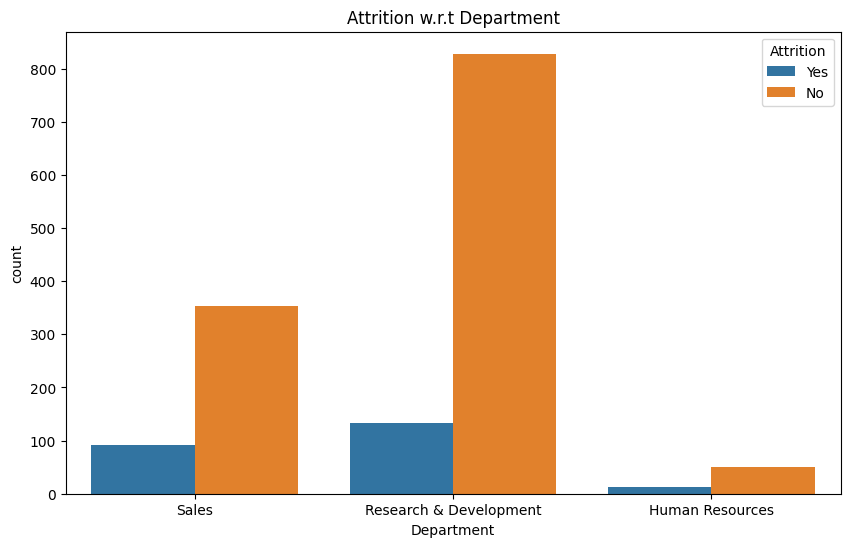

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition w.r.t Department')
plt.show()

In [7]:
# Group by Department and Attrition and count the number of employees in each group
attrition_counts = df.groupby(['Department', 'Attrition']).size().unstack()
attrition_counts

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


- Human Resources: Approximately 19% attrition rate.
- Research & Development: Approximately 14% attrition rate.
- Sales: Approximately 21% attrition rate.

Attrition with respect to Education of employees:

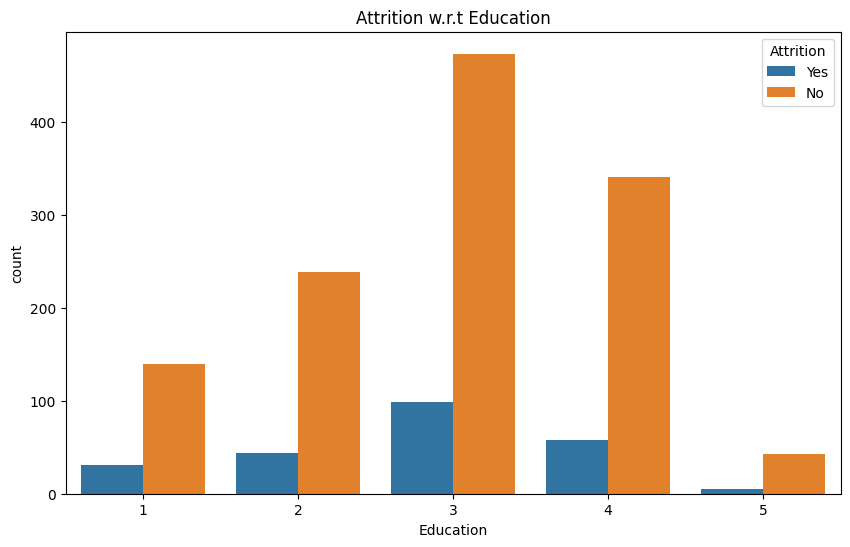

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Attrition', data=df)
plt.title('Attrition w.r.t Education')
plt.show()

In [9]:
attrition_counts2 = df.groupby(['Education', 'Attrition']).size().unstack()
attrition_counts2

Attrition,No,Yes
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5


1: 'Below College',
2: 'College',
3: 'Bachelor',
4: 'Master',
5: 'Doctor'

- Attrition Rates: Generally, attrition rates increase with higher education levels, with the highest attrition rate observed among those with a Bachelor's degree 

- Employees with a Doctorate (5) have the lowest attrition rate (5 left).
- Employees with a Bachelor's degree (3) have the second-lowest attrition rate (99 left).
- Employees with a Master's degree (4) have a mid attrition rate (58 left).
- Employees with a College degree (2) have a higher attrition rate (44 left).
- Employees with a Below College degree (1) have the highest attrition rate (31 left).

Attrition with respect to Education Field of employees:

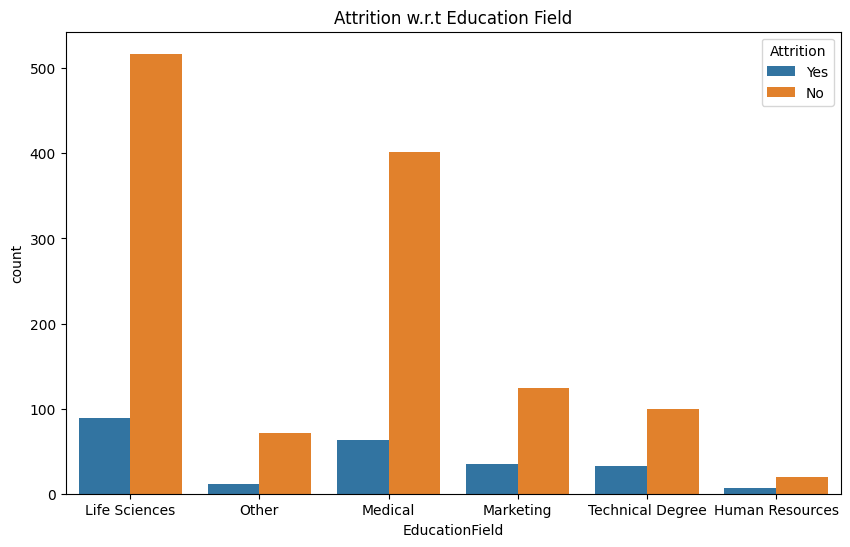

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationField', hue='Attrition', data=df)
plt.title('Attrition w.r.t Education Field')
plt.show()

In [11]:
attrition_counts3 = df.groupby(['EducationField', 'Attrition']).size().unstack()
attrition_counts3

Attrition,No,Yes
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


- Attrition Rates: Higher attrition rates are observed in fields such as Human Resources, Marketing, Medical, and Technical Degree compared to Life Sciences and Other fields.

Attrition with respect to Job Role of employees:

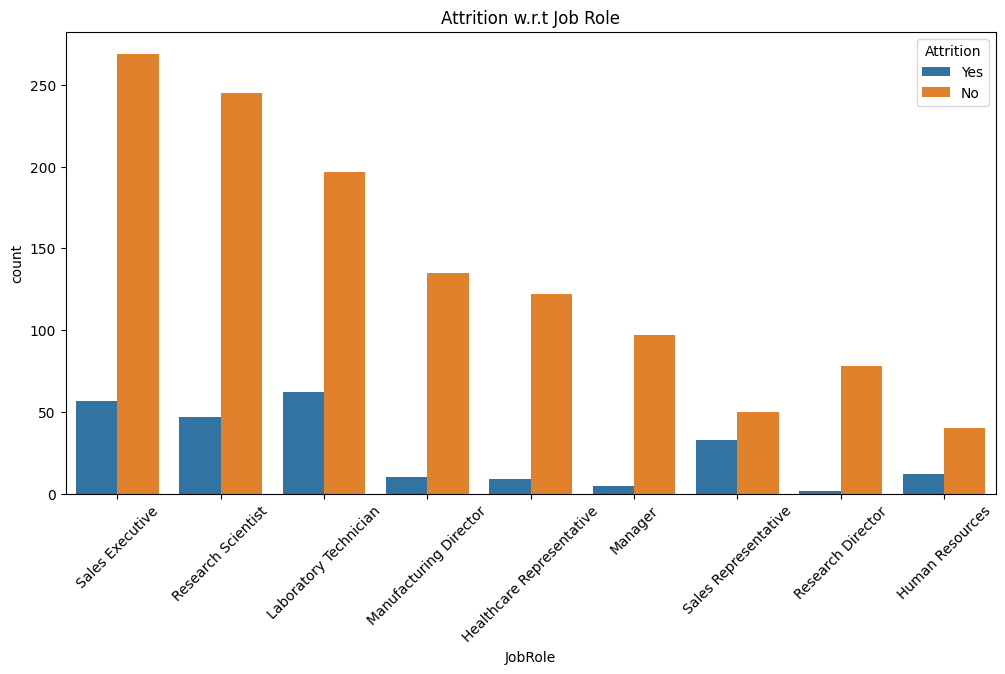

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Attrition w.r.t Job Role')
plt.xticks(rotation=45)
plt.show()

In [13]:
attrition_counts4 = df.groupby(['JobRole', 'Attrition']).size().unstack()
attrition_counts4

Attrition,No,Yes
JobRole,,
Healthcare Representative,122,9
Human Resources,40,12
Laboratory Technician,197,62
Manager,97,5
Manufacturing Director,135,10
Research Director,78,2
Research Scientist,245,47
Sales Executive,269,57
Sales Representative,50,33


- Attrition Rates: Higher attrition rates are notable among roles such as Sales Representative, Laboratory Technician, and Research Scientist.

- Job Roles: The highest attrition roles are Laboratory Technician (62 out of 259) and Sales Representative (33 out of 90).

Attrition with respect to Job Involvement :

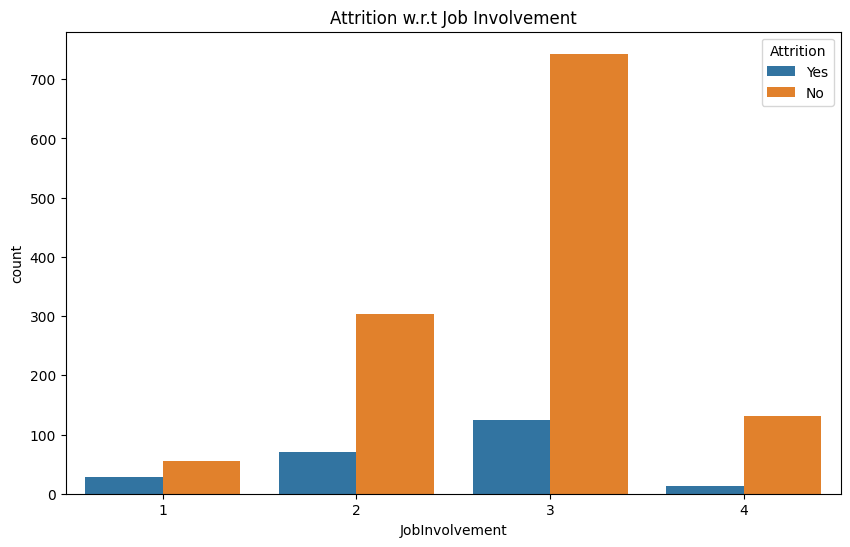

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='JobInvolvement', hue='Attrition', data=df)
plt.title('Attrition w.r.t Job Involvement')
plt.show()

In [15]:
attrition_counts5 = df.groupby(['JobInvolvement', 'Attrition']).size().unstack()
attrition_counts5

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


1: 'Low',
2: 'Medium',
3: 'High',
4: 'Very High'

- Attrition Rates: Attrition rates generally decrease as job involvement level increases.

Attrition with respect to Gender of employees:

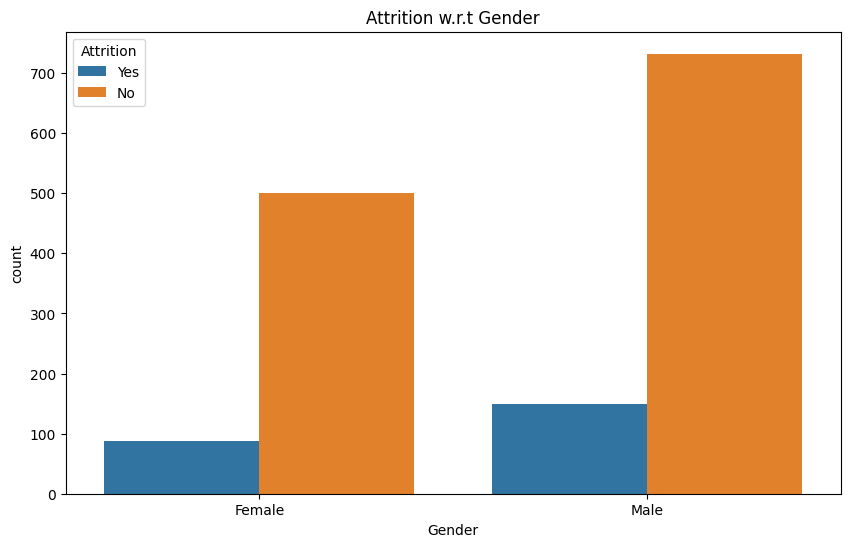

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Attrition w.r.t Gender')
plt.show()

In [17]:
attrition_counts6 = df.groupby(['Gender', 'Attrition']).size().unstack()
attrition_counts6

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


- Attrition Rates: The attrition rate is higher among males compared to females.

Distribution of Age:

C:\Users\DEBANGA\AppData\Local\Temp\ipykernel_11048\2981763051.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],hist=False)


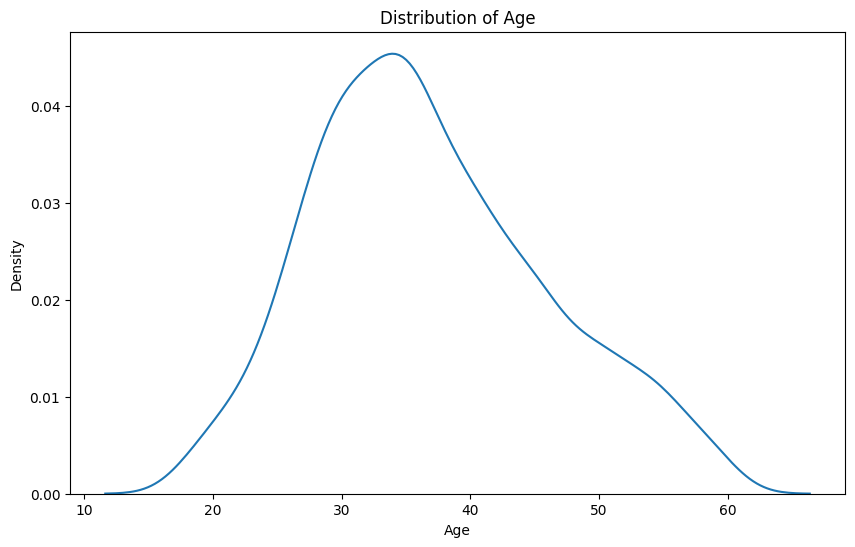

In [18]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Age'],hist=False)
plt.title('Distribution of Age')
plt.show()

Age column is very well normalized, most of employees are age between 25 to 40.

##### Data Preprocessing (Label Encoding)

In [19]:
# Label encoding for categorical features
label_encoders = {}
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

- BusinessTravel
0: 'Non-Travel',
1: 'Travel_Frequently',
2: 'Travel_Rarely'

- Department
0: 'Human Resources',
1: 'Research & Development',
2: 'Sales'

- EducationField
0: 'Human Resources',
1: 'Life Sciences',
2: 'Marketing',
3: 'Medical',
4: 'Other',
5: 'Technical Degree'

- Gender
0: 'Female',
1: 'Male'

- JobRole
0: 'Healthcare Representative',
1: 'Human Resources',
2: 'Laboratory Technician',
3: 'Manager',
4: 'Manufacturing Director',
5: 'Research Director',
6: 'Research Scientist',
7: 'Sales Executive',
8: 'Sales Representative'

- MaritalStatus
0: 'Divorced',
1: 'Married',
2: 'Single'

- OverTime:
0: 'No',
1: 'Yes'

##### Target Variable

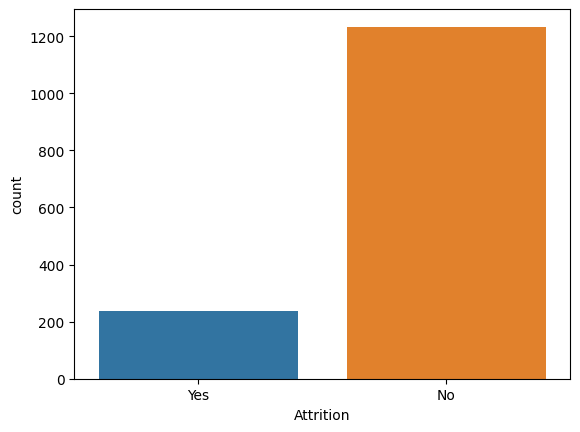

In [20]:
# Visualizing the target variable distribution
sns.countplot(x='Attrition', data=df)
plt.show()

In [21]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

### Over here we noticed that the Target column(Attrition) is Highly Imbalanced, we need to balance that data.

In [22]:
# Splitting features and target variable
X = df.drop(['Attrition','Over18'], axis=1)
y = df['Attrition'].map({'Yes': 1, 'No': 0})  # Converting 'Yes'/'No' to 1/0

Over-sampling

In [23]:
# Handling class imbalance using Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
print(X.shape, y.shape)
print(X_ros.shape, y_ros.shape)

(1470, 33) (1470,)
(2466, 33) (2466,)


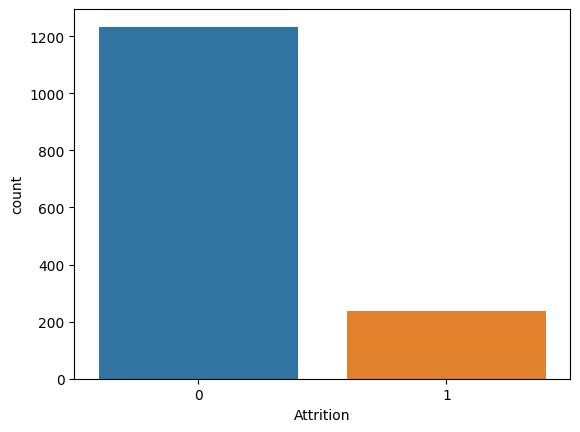

Attrition
0    1233
1     237
Name: count, dtype: int64


In [24]:
sns.countplot(x=y)
plt.show()
print(y.value_counts())

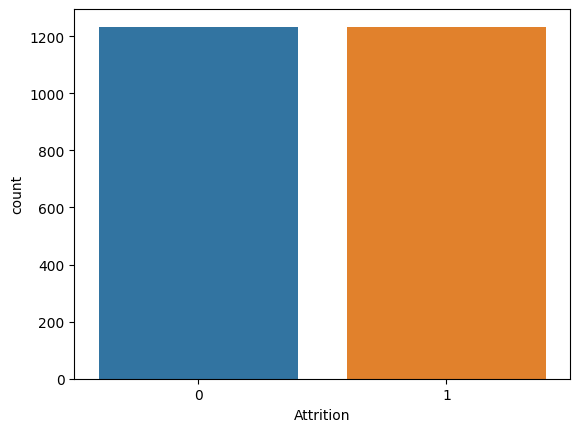

Attrition
1    1233
0    1233
Name: count, dtype: int64


In [25]:
sns.countplot(x=y_ros)
plt.show()
print(y_ros.value_counts())

Under-sampling

In [26]:
# Handling class imbalance using Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
print(X.shape, y.shape)
print(X_rus.shape, y_rus.shape)

(1470, 33) (1470,)
(474, 33) (474,)


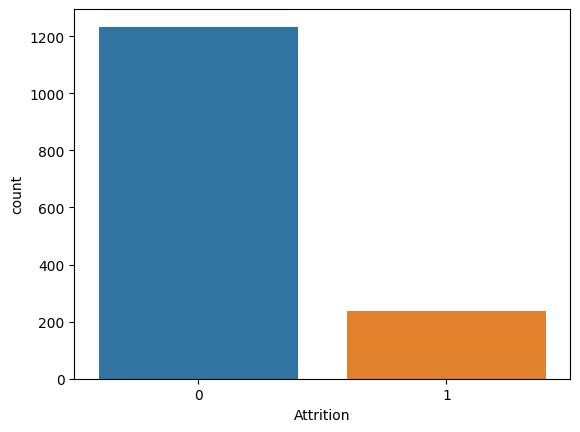

Attrition
0    1233
1     237
Name: count, dtype: int64


In [27]:
sns.countplot(x=y)
plt.show()

print(y.value_counts())

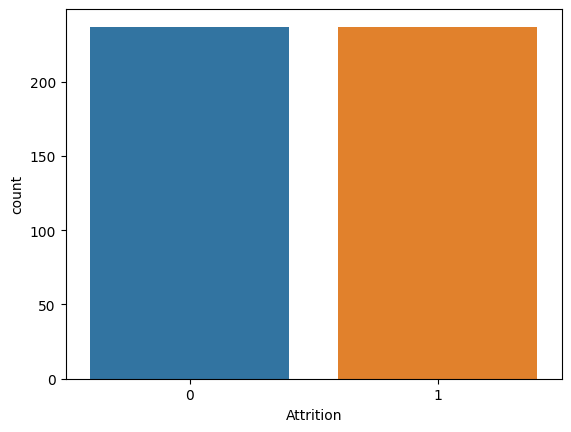

Attrition
0    237
1    237
Name: count, dtype: int64


In [28]:
sns.countplot(x=y_rus)
plt.show()

print(y_rus.value_counts())

##### Splitting train and test sets

In [29]:
# Splitting data into train and test sets
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42) #Over Sample
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42) #Under Sample

print(X_train_ros.shape, y_train_ros.shape,X_test_ros.shape, y_test_ros.shape)
print(X_train_rus.shape, y_train_rus.shape,X_test_rus.shape, y_test_rus.shape)

(1972, 33) (1972,) (494, 33) (494,)
(379, 33) (379,) (95, 33) (95,)


##### Train and evaluate models on both oversampled and undersampled data.

In [30]:
# Function to train and evaluate models
def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    results = {}

    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    results['Logistic Regression'] = {
        'accuracy': accuracy_score(y_test, y_pred_lr),
        'classification_report': classification_report(y_test, y_pred_lr),
        'confusion_matrix' : confusion_matrix(y_test, y_pred_lr)
    }

    # Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100,random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    results['Random Forest'] = {
        'accuracy': accuracy_score(y_test, y_pred_rf),
        'classification_report': classification_report(y_test, y_pred_rf),
        'confusion_matrix':confusion_matrix(y_test, y_pred_rf)
    }

    return results


In [31]:
# Evaluate models on oversampled data
results_ros = train_and_evaluate_model(X_train_ros, X_test_ros, y_train_ros, y_test_ros)

C:\Users\DEBANGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# Evaluate models on undersampled data
results_rus = train_and_evaluate_model(X_train_rus, X_test_rus, y_train_rus, y_test_rus)

C:\Users\DEBANGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Print the results
print("Oversampled Data Results:")
for model, metrics in results_ros.items():
    print(f"{model} - Accuracy: {metrics['accuracy']*100:.2f}%")
    print(f"Classification Report:\n{metrics['classification_report']}\n")

print("Undersampled Data Results:")
for model, metrics in results_rus.items():
    print(f"{model} - Accuracy: {metrics['accuracy']*100:.2f}%")
    print(f"Classification Respot:\n{metrics['classification_report']}\n")

Oversampled Data Results:
Logistic Regression - Accuracy: 64.37%
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       250
           1       0.63      0.69      0.66       244

    accuracy                           0.64       494
   macro avg       0.65      0.64      0.64       494
weighted avg       0.65      0.64      0.64       494


Random Forest - Accuracy: 96.36%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       250
           1       0.96      0.97      0.96       244

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494


Undersampled Data Results:
Logistic Regression - Accuracy: 70.53%
Classification Respot:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68        47
  

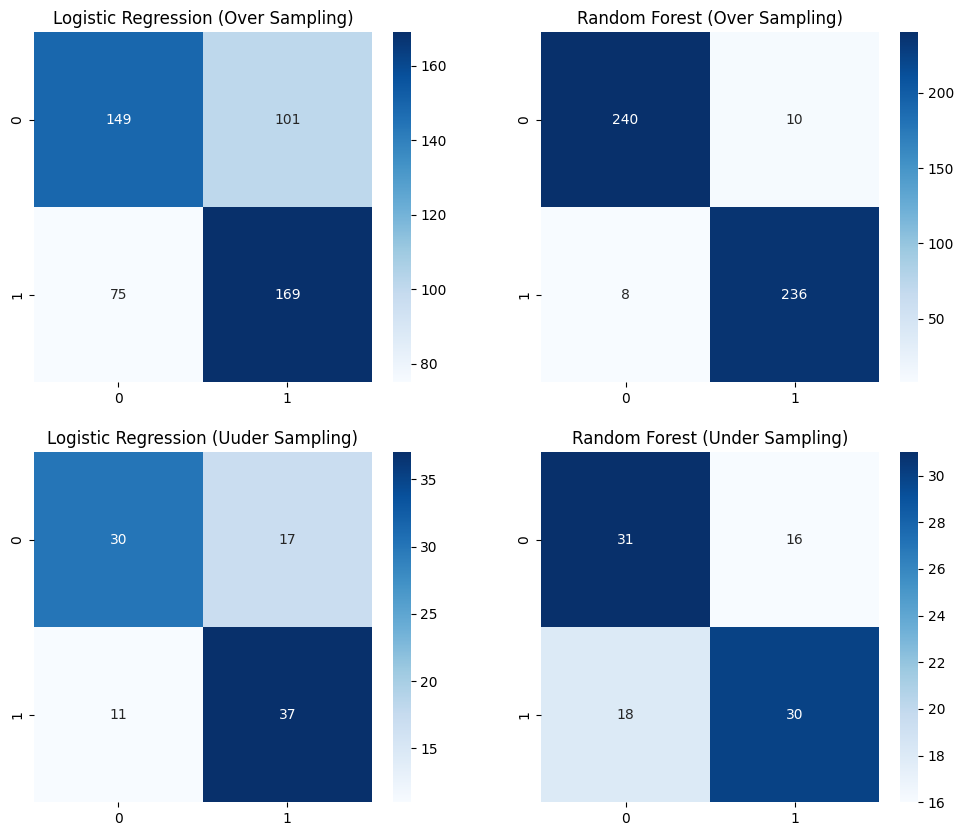

In [35]:
# Plotting confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(results_ros['Logistic Regression']['confusion_matrix'], annot=True, fmt='d', ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title('Logistic Regression (Over Sampling)')

sns.heatmap(results_ros['Random Forest']['confusion_matrix'], annot=True, fmt='d', ax=axes[0, 1], cmap='Blues')
axes[0, 1].set_title('Random Forest (Over Sampling)')

sns.heatmap(results_rus['Logistic Regression']['confusion_matrix'], annot=True, fmt='d', ax=axes[1, 0], cmap='Blues')
axes[1, 0].set_title('Logistic Regression (Uuder Sampling)')

sns.heatmap(results_rus['Random Forest']['confusion_matrix'], annot=True, fmt='d', ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title('Random Forest (Under Sampling)')

plt.show()

#### ***The Random Forest model on oversampled data achieves the highest accuracy at 96.36%, with strong precision and recall metrics, indicating it is the most effective approach for predicting employee attrition according to this dataset.***